# Capstone Project 2: Preprocessing

Two things will be done here. One is to encoder the categorical features. Second is to do some feature engineering if needed.

The dataset is download from Kaggle. It is about house price. The goal will be use this dataset and build a predictive model for house pricing.

https://www.kaggle.com/c/house-prices-advanced-regression-techniques/overview

## The objective 
The objective of this project would be building a predictive model for house pricing. The result can be used to negotiate house price.
The modeling method can be logistic regression, random forest, gradient boosting, and SVM...
And compare them and pick the best performance one for prediction

### STEP1: Load the tools

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

from scipy.stats import norm
from scipy import stats

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

### STEP2: Load the dataset

In [2]:
# load the data for training validate and the model
df = pd.read_csv('dataset_EDA_v2.csv')

In [3]:
df.head()

,Id,OverallQual,GrLivArea,TotalBsmtSF,GarageArea,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,SalePrice
0,1,7,1710,856,548,856,2,8,2003,208500
1,2,6,1262,1262,460,1262,2,6,1976,181500
2,3,7,1786,920,608,920,2,6,2001,223500
3,4,7,1717,756,642,961,1,7,1915,140000
4,5,8,2198,1145,836,1145,2,9,2000,250000


In [4]:
df.drop(columns=['Id'])

,OverallQual,GrLivArea,TotalBsmtSF,GarageArea,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,SalePrice
0,7,1710,856,548,856,2,8,2003,208500
1,6,1262,1262,460,1262,2,6,1976,181500
2,7,1786,920,608,920,2,6,2001,223500
3,7,1717,756,642,961,1,7,1915,140000
4,8,2198,1145,836,1145,2,9,2000,250000
...,...,...,...,...,...,...,...,...,...
1441,6,1647,953,460,953,2,7,1999,175000
1442,6,2073,1542,500,2073,2,7,1978,210000
1443,7,2340,1152,252,1188,2,9,1941,266500
1444,5,1078,1078,240,1078,1,5,1950,142125


### In the data wrangling step, I have already done some work to explore the data, drop some features with too many missing data, and remove outliers 

### STEP3: Checking missing data

In [5]:
df.isnull().sum().sum()

0

### STEP4: Preprocessing

In [6]:
y = df['SalePrice']
X = df.drop(columns=['SalePrice', 'Id'])

In [7]:
features = X.columns

In [8]:
features

Index(['OverallQual', 'GrLivArea', 'TotalBsmtSF', 'GarageArea', '1stFlrSF',
       'FullBath', 'TotRmsAbvGrd', 'YearBuilt'],
      dtype='object')

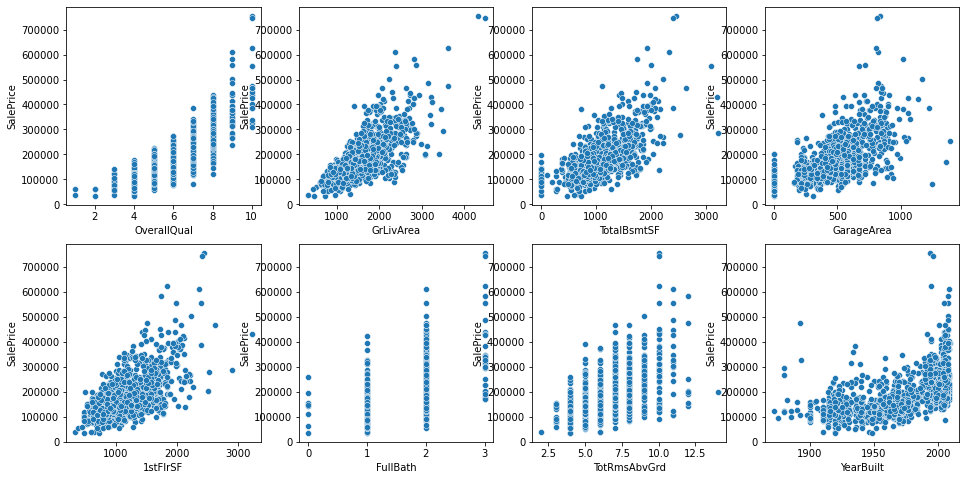

In [9]:
fig = plt.figure(figsize=(16, 8))

plt.subplot(2, 4, 1)
sns.scatterplot(data=df, x='OverallQual', y='SalePrice')

plt.subplot(2, 4, 2)
sns.scatterplot(data=df, x='GrLivArea', y='SalePrice')

plt.subplot(2, 4, 3)
sns.scatterplot(data=df, x='TotalBsmtSF', y='SalePrice')

plt.subplot(2, 4, 4)
sns.scatterplot(data=df, x='GarageArea', y='SalePrice')

plt.subplot(2, 4, 5)
sns.scatterplot(data=df, x='1stFlrSF', y='SalePrice')

plt.subplot(2, 4, 6)
sns.scatterplot(data=df, x='FullBath', y='SalePrice')

plt.subplot(2, 4, 7)
sns.scatterplot(data=df, x='TotRmsAbvGrd', y='SalePrice')

plt.subplot(2, 4, 8)
sns.scatterplot(data=df, x='YearBuilt', y='SalePrice')

plt.show()

In [10]:
### deleting the rows for 'TotalBsmtSF'>3000

df = df[df['TotalBsmtSF']<3000]
df = df[df['GarageArea']<1200]

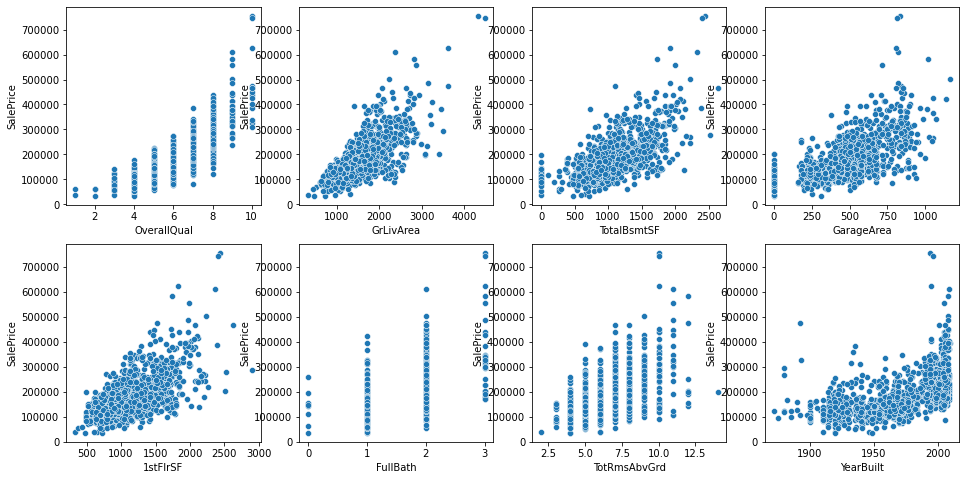

In [11]:
fig = plt.figure(figsize=(16, 8))

plt.subplot(2, 4, 1)
sns.scatterplot(data=df, x='OverallQual', y='SalePrice')

plt.subplot(2, 4, 2)
sns.scatterplot(data=df, x='GrLivArea', y='SalePrice')

plt.subplot(2, 4, 3)
sns.scatterplot(data=df, x='TotalBsmtSF', y='SalePrice')

plt.subplot(2, 4, 4)
sns.scatterplot(data=df, x='GarageArea', y='SalePrice')

plt.subplot(2, 4, 5)
sns.scatterplot(data=df, x='1stFlrSF', y='SalePrice')

plt.subplot(2, 4, 6)
sns.scatterplot(data=df, x='FullBath', y='SalePrice')

plt.subplot(2, 4, 7)
sns.scatterplot(data=df, x='TotRmsAbvGrd', y='SalePrice')

plt.subplot(2, 4, 8)
sns.scatterplot(data=df, x='YearBuilt', y='SalePrice')

plt.show()

### Change those features into categorical data, and then get dummies
They are 'OverallQual', 'FullBath', 'TotRmsAbvGrd'

In [13]:
df['OverallQual'] = df['OverallQual'].astype('category')
df['FullBath'] = df['FullBath'].astype('category')
df['TotRmsAbvGrd'] = df['TotRmsAbvGrd'].astype('category')

In [16]:
df = pd.get_dummies(df, columns=['OverallQual', 'FullBath', 'TotRmsAbvGrd'])

In [19]:
df.shape

(1439, 33)

### Save the date for model building in next step

In [21]:
df.to_csv('data_preprocessing.csv')